## Basic EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
lung_ade = pd.read_csv("luad_tcga_clinical_data.tsv", sep='\t')

In [3]:
lung_ade.describe()

,Diagnosis Age,Neoplasm Disease Stage American Joint Committee on Cancer Code.1,Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage,American Joint Committee on Cancer Lymph Node Stage Code.1,American Joint Committee on Cancer Lymph Node Stage Code,ALK Translocation Variant,Carbon monoxide diffusion dlco,Days to Sample Collection.,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,days_to_patient_progression_free,...,Started Smoking Year,Stopped Smoking Year,Specimen Current Weight,Specimen Freezing Means,Specimen Second Longest Dimension,Stage Other,Time between clamping and freezing,Time between excision and freezing,TMB (nonsynonymous),Patient Smoking History Category
count,505.000000,0.0,0.0,0.0,0.0,0.0,200.000000,112.000000,505.0,0.0,...,279.000000,262.000000,0.0,0.0,408.000000,0.0,0.0,0.0,230.000000,510.000000
mean,65.338614,NaN,NaN,NaN,NaN,NaN,73.338400,1073.758929,0.0,NaN,...,1964.996416,1994.847328,NaN,NaN,0.764951,NaN,NaN,NaN,8.001739,2.813725
std,10.004275,NaN,NaN,NaN,NaN,NaN,22.728689,1439.793499,0.0,NaN,...,12.519768,13.608918,NaN,NaN,0.309429,NaN,NaN,NaN,8.072463,1.081460
min,33.000000,NaN,NaN,NaN,NaN,NaN,1.000000,8.000000,0.0,NaN,...,1930.000000,1948.000000,NaN,NaN,0.100000,NaN,NaN,NaN,0.433333,1.000000
25%,59.000000,NaN,NaN,NaN,NaN,NaN,57.000000,98.750000,0.0,NaN,...,1956.000000,1985.000000,NaN,NaN,0.600000,NaN,NaN,NaN,2.708333,2.000000
50%,66.000000,NaN,NaN,NaN,NaN,NaN,73.000000,222.500000,0.0,NaN,...,1965.000000,1997.500000,NaN,NaN,0.700000,NaN,NaN,NaN,5.333333,3.000000
75%,73.000000,NaN,NaN,NaN,NaN,NaN,87.250000,1788.250000,0.0,NaN,...,1972.000000,2007.000000,NaN,NaN,0.900000,NaN,NaN,NaN,9.808333,4.000000
max,88.000000,NaN,NaN,NaN,NaN,NaN,178.000000,6271.000000,0.0,NaN,...,1999.000000,2013.000000,NaN,NaN,2.000000,NaN,NaN,NaN,44.766667,5.000000


In [4]:
lung_ade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586 entries, 0 to 585
Columns: 109 entries, Study ID to Vial number
dtypes: float64(50), int64(2), object(57)
memory usage: 499.1+ KB


In [5]:
lung_ade.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Diagnosis Age',
       'Neoplasm Disease Stage American Joint Committee on Cancer Code.1',
       'Neoplasm American Joint Committee on Cancer Clinical Distant Metastasis M Stage',
       'American Joint Committee on Cancer Metastasis Stage Code',
       'American Joint Committee on Cancer Lymph Node Stage Code.1',
       'American Joint Committee on Cancer Lymph Node Stage Code',
       'Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code',
       ...
       'Adjuvant Postoperative Targeted Therapy Administered Indicator',
       'Time between clamping and freezing',
       'Time between excision and freezing', 'Tissue Source Site',
       'TMB (nonsynonymous)', 'Patient Smoking History Category',
       'Primary Therapy Outcome Success Type', 'Tumor Site',
       'Person Neoplasm Status', 'Vial number'],
      dtype='object', length=109)

In [6]:
lung_ade1 = lung_ade.dropna(axis = 1,how='all')  

In [7]:
lung_ade1.columns

Index(['Study ID', 'Patient ID', 'Sample ID', 'Diagnosis Age',
       'American Joint Committee on Cancer Metastasis Stage Code',
       'Neoplasm Disease Lymph Node Stage American Joint Committee on Cancer Code',
       'Neoplasm Disease Stage American Joint Committee on Cancer Code',
       'American Joint Committee on Cancer Publication Version Type',
       'American Joint Committee on Cancer Tumor Stage Code',
       'ALK Analysis Type', 'ALK Translocation Status', 'Cancer Type',
       'Cancer Type Detailed', 'Carbon monoxide diffusion dlco',
       'Days to Sample Collection.',
       'Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value',
       'Disease Free (Months)', 'Disease Free Status', 'Disease code',
       'Performance Status', 'Ethnicity Category',
       'Fev1 fvc ratio postbroncholiator', 'Fev1 fvc ratio prebroncholiator',
       'Fev1 percent ref postbroncholiator',
       'Fev1 percent ref prebroncholiator', 'Form completion date',
       'Fracti

<AxesSubplot:xlabel='Sex', ylabel='count'>

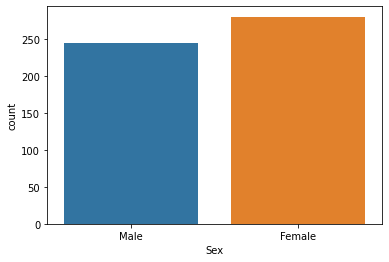

In [8]:
sns.countplot(lung_ade1['Sex'])

In [9]:
lung_ade1['Sex'].value_counts()

Female    280
Male      244
Name: Sex, dtype: int64

In [10]:
lung_ade1.groupby('Sex')['Patient Smoking History Category'].value_counts()

Sex     Patient Smoking History Category
Female  4.0                                 101
        3.0                                  63
        1.0                                  55
        2.0                                  53
        5.0                                   1
Male    3.0                                  74
        4.0                                  70
        2.0                                  69
        1.0                                  21
        5.0                                   3
Name: Patient Smoking History Category, dtype: int64

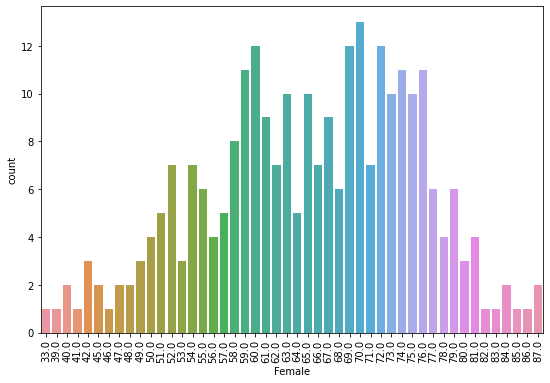

In [11]:
plt.figure(figsize=(9, 6))
sns.countplot(lung_ade1[lung_ade1['Sex'] == 'Female']['Diagnosis Age'])
plt.xlabel('Female')
plt.xticks(rotation=90)
plt.show()

In [12]:
lung_ade1['Overall Survival Status'].value_counts()

0:LIVING      336
1:DECEASED    188
Name: Overall Survival Status, dtype: int64

In [13]:
lung_ade1.groupby('Sex')['Overall Survival Status'].value_counts()

Sex     Overall Survival Status
Female  0:LIVING                   182
        1:DECEASED                  98
Male    0:LIVING                   154
        1:DECEASED                  90
Name: Overall Survival Status, dtype: int64

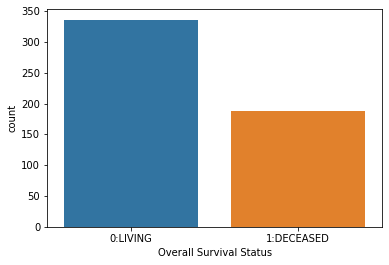

In [14]:
sns.countplot(lung_ade1['Overall Survival Status'])
plt.show()

<AxesSubplot:xlabel='Diagnosis Age', ylabel='Overall Survival (Months)'>

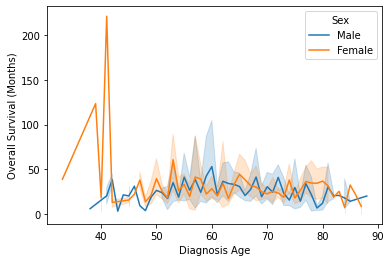

In [15]:
sns.lineplot(data = lung_ade1, x="Diagnosis Age", y="Overall Survival (Months)", hue="Sex")

In [16]:
lung_ade1['Smoking_year'] = lung_ade1['Stopped Smoking Year'] - lung_ade1['Started Smoking Year']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor


In [23]:
new_data = lung_ade1[['Overall Survival Status', 'Sex', 'Diagnosis Age','Fraction Genome Altered', 'Longest Dimension', 'Smoking_year',
               'Mutation Count', 'Shortest Dimension', 'Person Cigarette Smoking History Pack Year Value',
               'Specimen Second Longest Dimension', 'TMB (nonsynonymous)']].dropna()



In [24]:
new_data

,Overall Survival Status,Sex,Diagnosis Age,Fraction Genome Altered,Longest Dimension,Smoking_year,Mutation Count,Shortest Dimension,Person Cigarette Smoking History Pack Year Value,Specimen Second Longest Dimension,TMB (nonsynonymous)
5,0:LIVING,Male,66.0,0.0661,0.8,24.0,119.0,0.4,20.00,0.8,4.033333
7,0:LIVING,Female,58.0,0.3056,1.8,30.0,487.0,0.3,15.00,0.9,16.800000
9,1:DECEASED,Male,76.0,0.2340,1.6,37.0,464.0,0.5,19.00,0.9,15.800000
14,0:LIVING,Female,74.0,0.3903,0.9,43.0,344.0,0.3,65.00,0.7,11.866667
15,0:LIVING,Male,62.0,0.3183,1.0,49.0,956.0,0.4,98.00,0.8,32.900000
...,...,...,...,...,...,...,...,...,...,...,...
502,0:LIVING,Female,42.0,0.3733,1.3,2.0,150.0,0.3,0.15,0.7,5.066667
508,0:LIVING,Female,76.0,0.0936,1.2,20.0,233.0,0.6,25.00,0.6,7.966667
512,0:LIVING,Female,83.0,0.3163,1.7,38.0,387.0,0.6,30.00,1.0,13.333333
515,0:LIVING,Female,72.0,0.0268,1.3,25.0,81.0,0.2,22.50,1.0,2.700000


In [25]:
new_data['Overall Survival Status'] = new_data['Overall Survival Status'].apply(lambda x: x.replace("0:LIVING", "0"))
new_data['Overall Survival Status'] = new_data['Overall Survival Status'].apply(lambda x: x.replace("1:DECEASED", "1"))
new_data['Sex'] = new_data['Sex'].apply(lambda x: x.replace("Male", "1"))
new_data['Sex'] = new_data['Sex'].apply(lambda x: x.replace("Female", "0"))




In [28]:
new_data.to_csv("Lung_new_data.csv")